# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_mouse_df = pd.merge(mouse_metadata,study_results)

# Display the data table for preview
combined_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [47]:
# Checking the number of mice.
mouse_count=len(combined_mouse_df['Mouse ID'].unique())
mouse_count

249

In [48]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice=combined_mouse_df.duplicated(subset=["Mouse ID","Timepoint"])
duplicate_id=combined_mouse_df.loc[duplicate_df,"Mouse ID"]
number_of_duplicates=duplicate_id.unique()

number_of_duplicates

array(['g989'], dtype=object)

In [49]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_table=combined_mouse_df[combined_mouse_df.duplicated(subset=["Mouse ID","Timepoint"])]
duplicate_table.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [50]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data = combined_mouse_df.drop_duplicates(subset=["Mouse ID", "Timepoint"])
clean_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [51]:
# Checking the number of mice in the clean DataFrame.
mouse_count_clean=len(clean_mouse_data['Mouse ID'].unique())
mouse_count_clean

249

## Summary Statistics

In [52]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
group = clean_mouse_data.groupby('Drug Regimen')

mean = group['Tumor Volume (mm3)'].mean()
medn = group['Tumor Volume (mm3)'].median()
var = group['Tumor Volume (mm3)'].var()
std = group['Tumor Volume (mm3)'].std()
stder = group['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
stat_table = pd.DataFrame({
    "Mean Tumor Volume": mean,
    "Median Tumor Volume": medn,
    "Tumor Volume Variance": var,
    "Tumor Volume Std. Dev.": std,
    "Tumor Volume Std. Err.": stder
})
stat_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [53]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
group.agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

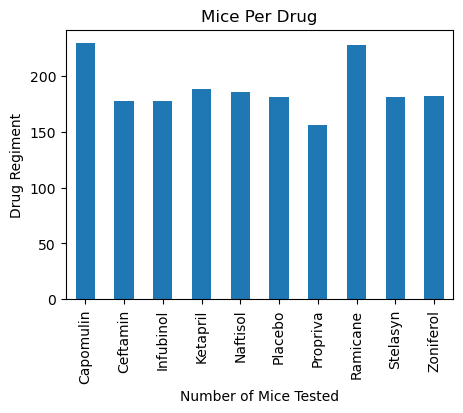

<Figure size 640x480 with 0 Axes>

In [54]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_per_drug = clean_mouse_data.groupby(["Drug Regimen"]).count()["Mouse ID"]

pandas_bar_plot=mice_per_drug.plot(kind="bar",figsize=(5,3.5))
plt.title("Mice Per Drug")
plt.xlabel("Number of Mice Tested")
plt.ylabel("Drug Regiment")
plt.show()

plt.tight_layout()

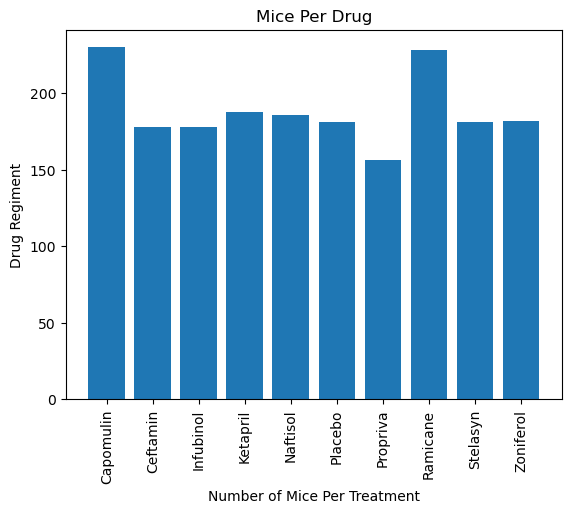

<Figure size 640x480 with 0 Axes>

In [57]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis=np.arange(len(mice_per_drug))
y_axis=(clean_mouse_data.groupby(["Drug Regimen"])["Mouse ID"].count())

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, mice_per_drug.index.values,rotation="vertical")

plt.bar(x_axis, y_axis, alpha=1, align="center") 
plt.title("Mice Per Drug")
plt.xlabel("Number of Mice Per Treatment")
plt.ylabel("Drug Regiment")
plt.show()

plt.tight_layout()

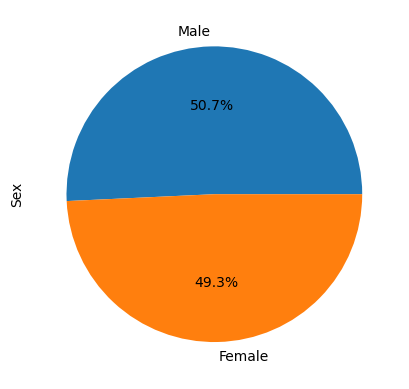

In [81]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_count = clean_mouse_data['Sex'].value_counts()
sex_count.plot(kind="pie", autopct="%1.1f%%")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

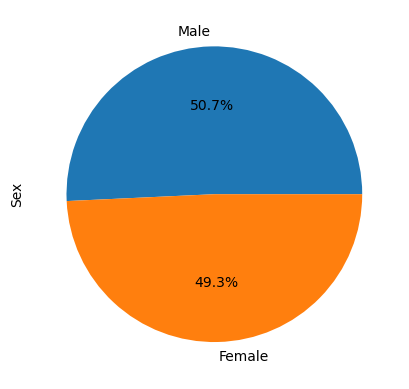

In [82]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
colors = ["blue","orange"]

plt.pie(sex_count.values, labels=sex_count.index.values,autopct="%1.1f%%")
plt.ylabel('Sex') 
plt.show

## Quartiles, Outliers and Boxplots

In [84]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
timepoint_max_df = pd.DataFrame(clean_mouse_data.groupby(['Mouse ID'])['Timepoint'].max())
timepoint_max_df

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_max_df= pd.merge(clean_mouse_data, timepoint_max_df, how='right', on=('Mouse ID', 'Timepoint'))

merged_max_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1


In [92]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
total_vol_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for i in range(len(treatments)): 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor = merged_max_df.loc[merged_max_df['Drug Regimen'] == treatments[i], ['Tumor Volume (mm3)']]
    
    # add subset 
    total_vol_data.append(tumor['Tumor Volume (mm3)'])
    
    # Determine outliers using upper and lower bounds
    quartiles = total_vol_data[i].quantile([.25, .5, .75])
    lowrq = quartiles[.25]
    upprq = quartiles[.75]
    iqr = upprq - lowrq
    lwr_bnd = lowrq - (1.5 * iqr)
    upr_bnd = upprq + (1.5 * iqr)
    
    out = total_vol_data[i].loc[(total_vol_data[i] < lwr_bnd) | (total_vol_data[i] > upr_bnd)]
    print(f"{treatments[i]}'s potential outliers: {out}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


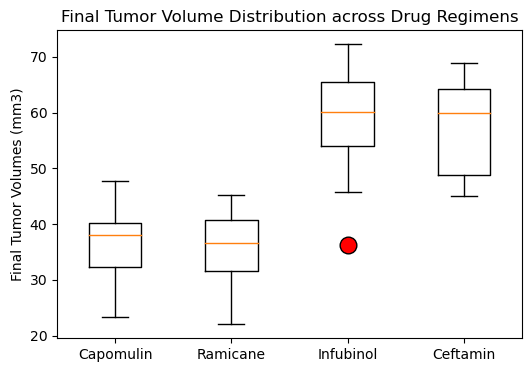

In [100]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(6, 4))
pos = np.arange(len(total_vol_data)) + 1
bp = plt.boxplot(total_vol_data, positions=pos, labels=treatments)

plt.setp(bp['fliers'], markerfacecolor='red', markersize=12)
plt.title("Final Tumor Volume Distribution across Drug Regimens")
plt.ylabel('Final Tumor Volumes (mm3)')
plt.show()

## Line and Scatter Plots

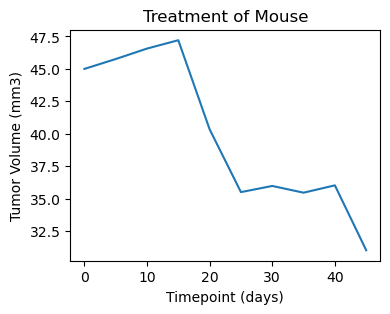

In [110]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
cap_mice = clean_mouse_data.loc[clean_mouse_data['Drug Regimen'] == 'Capomulin', :]
sample = cap_mice['Mouse ID'].unique()

# random
mouse = np.random.choice(sample)
random_mouse = clean_mouse_data.loc[clean_mouse_data['Mouse ID'] == mouse, :]

# Plot results 
plt.figure(figsize=(4, 3))
plt.plot(random_mouse['Timepoint'], random_mouse['Tumor Volume (mm3)'])

# labels
plt.title('Treatment of Mouse')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

C:\Users\Roses\AppData\Local\Temp\ipykernel_20468\3851975160.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cap = grp.mean()


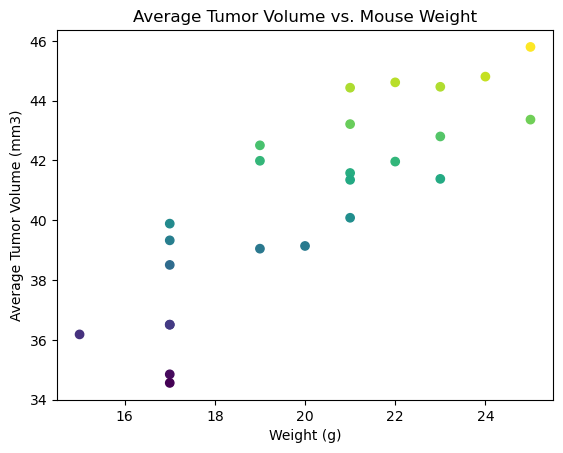

In [113]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# dataframe grouped by mouse with tumor volume averages
grp = cap_mice.groupby('Mouse ID')
cap = grp.mean()

# Graph scatterplot of weight vs ave. tumor volume (and make it pretty colors)
plt.scatter(cap['Weight (g)'], cap['Tumor Volume (mm3)'], c=cap['Tumor Volume (mm3)'])

# labels
plt.title("Average Tumor Volume vs. Mouse Weight")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


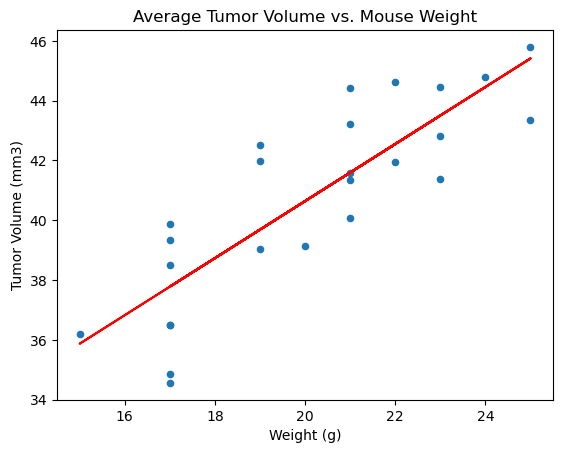

In [114]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

cap.plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)', title="Average Tumor Volume vs. Mouse Weight")

# Calculate linear regression
slope, intercept, rvalue, pvalue, stderr = st.linregress(cap['Weight (g)'], cap['Tumor Volume (mm3)'])
regress = cap['Weight (g)'] * slope + intercept

# Plot regression line
regress_line, = plt.plot(cap['Weight (g)'], regress, color='red')

# Calculate and display correlation info
correlation = st.pearsonr(cap['Weight (g)'], cap['Tumor Volume (mm3)'])[0]
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation, 2)}")